# Deep Learning II (Answer)

Yi-Chi Liao (yi-chi.liao@aalto.fi) 

PhD student in User Interfaces group.

## Outline of the lecture<a id="outline">

<div class="alert alert-block alert-success">
<ul>
        <li>Input Sensing Flow (<a href="#0">Part 0</a>) - 20 mins:
            <ul>
              <li><a href="#01">Input sensing flow</a></li>
              <li><a href="#02">Transducer (transfer function)</a></li>
              <li><a href="#03">Signal processor (filter)</a></li>
              <li><a href="#04">Recognizer and example (SVM for gesture recognition)</a></li>
            </ul>
            <br>
        <li>CNN, fully connected layers and applications (<a href="#1">Part 1</a>) - 25 mins:
            <ul>
              <li><a href="#11">Fully connected layers and example (hand gesture recognition)</a></li>
              <li><a href="#12">CNN and example (recognizing digits from MNIST dataset)</a></li>
              <li><a href="#13">Advanced algorithms: R-CNN and YOLO</a></li>
            </ul>
            <br>
        <li>RNN, LSTM and applications (<a href="#2">Part 2</a>) - 20 mins:
            <ul>
              <li><a href="#21">From RNN to LSTM</a></li>
              <li><a href="#22">LSTM using Keras (text generator using LSTM) - 20 mins: </a></li>
            </ul>
            <br>
        <li>Auto-encoder and its applications (<a href="#3">Part 3</a>) - 20 mins:
            <ul>
              <li><a href="#31">Overview of autoencoder</a></li>
              <li><a href="#32">Example 1: compress MNIST fashion images</a></li>
              <li><a href="#33">Example 2: visualize the latent space of MNIST fashion images</a></li>
            </ul>
            <br>
        <li>Advanced topics (if time permits) (<a href="#4">Part 4</a>) - 10 mins:
            <ul>
              <li><a href="#41">Some examples of DL in HCI</a></li>
              <li><a href="#42">Learn faster from previous experiences: Transfer Learning</a></li>
              <li><a href="#43">Learning to learn fast: meta-learning</a></li>
            </ul>
            <br>
        <li><a href="#summary">Summary</a>
    </ul>
</div>
    
    
<div class="alert alert-block alert-success">
<h2><img src="images/goal.png" width=20, align="left">&nbsp;Learning objectives of this lecture</h2>
    <ul>
    <li>Part 0 Sensing flow:
    <ul>
        <li>know transfer function and filters (exercise 1)
    </ul>
    <li>Part 1 CNN and fully connected layers:
    <ul>
        <li>build a model using CNN & fully connected layers (exercise 2)
    </ul>
    <li>Part 2 RNN and LSTM:
    <ul>
        <li>build a model using LSTM (exercise 3)
    </ul>
    <li>Part 3 Autoencoder:
    <ul>
        <li>apply autoencoder for various purposes (exercise 4, 5) 
    </ul>
    <li>Part 4 Advanced topics:
    <ul>
        <li>have basic idea about transfer learning and meta-learning (optional advanced exercise)
    </ul>
</div>


In [1]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.interpolate import interp1d
import pandas as pd
import random
import math
import glob
import csv
import pickle
import heapq
import matplotlib as mpl

from IPython.display import Image
from IPython.display import HTML

2.2.0


# Part 0: Input sensing flow<a id="0">

<div class="alert alert-block alert-success">
<h2><img src="images/goal.png" width=20, align="left">&nbsp;Learning objectives of part 0</h2>
    <br>Learn to:
    <ul>
        <li>know the basic working principles of the sensors
        <li>understand the major components in the sensing pipeline, including transducer, signal processor, and recognizer
    </ul>
</div>


### Discussion: describe what happens from you move your mouse to the cursor moves on the screen? (2 mins)

<img src="images/mouse.jpg" width=300>

## 0.1 Overview of input sensing flow<a id="01">

---
### Overview of the pipeline
<img src="images/sensing-flow.png"  width=600>

---
### Mouse as an example
<img src="images/mouse-sensing.png"  width=600>

## 0.2 Transducer (digital sensor) <a id="02">

### Definition:
a device, module, or subsystem whose purpose is to detect events or changes in its environment and send the nformation to other electronics.

<img src="images/transducer.png" width=500>

- Physical phenomena: mechanical, electrical, sonic, optical, radiation, magnetic, gravitational, …
- Electric property: voltage, resistance, capacitance, inductance
- Transfer function: output = f (input)

### Transfer function
a mathematical function which theoretically models the device's output for each possible input.
- Digital transfer function: having two-state output values (on/off)
- Analog transfer function: having continuous ouput values

### Identify what are the digital sensors and analog sensors on this PS control

<img src="images/controller.png"  width=600>

---

### Calibration: identify the transfer function from data

1. Collect a set of <ground truth, sensor value> data 
2. Fit the model: linear regression or polynomial regression

#### Example: a depth-sensing button using hall sensor (sensing magnetic field) 

<img src="images/transferf.png"  width=600>

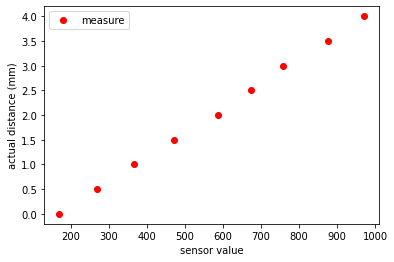

In [51]:
'''
# Psudo measurements are derived from the following code:
actual_distance = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4] 
sensor_values = []
a = 200
b = 170
for i in actual_distance:
    sensor_values.append(round(i* a + b +np.random.normal(0, 12),3))
print (sensor_values)
'''

actual_distance = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]  # Ground truth: denote as Y for regression
sensor_values =   [169.975, 269.01, 367.097, 470.826, 587.075, 674.498, 758.666, 876.317, 970.015]
 # sensor value: denote as X for regression

plt.plot(sensor_values, actual_distance, 'ro', label='measure')
plt.xlabel('sensor value')
plt.ylabel('actual distance (mm)')
plt.legend()
plt.show()

### Question: what is the the relation between the actual distance and the sensor value?

slope:  0.004988715988397399
intercept:  -0.851039547031808


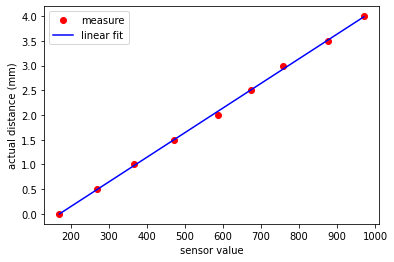

In [4]:
slope, intercept = np.polyfit(sensor_values, actual_distance, 1) # Perform linear regression
print ('slope: ', slope)
print ('intercept: ', intercept)

abline_values = [slope * i + intercept for i in sensor_values]
plt.plot(sensor_values, actual_distance, 'ro', label='measure')
plt.plot(sensor_values, abline_values, 'b', label='linear fit')
plt.xlabel('sensor value')
plt.ylabel('actual distance (mm)')
plt.legend()
plt.show()

### Question: what is the actual distance if the sensor value is 875?

In [5]:
## TODO: 
new_sensor_value = 875
estimate_distance =  slope * new_sensor_value + intercept  
print (estimate_distance)

3.5140869428159163


### Another sensor, different set of data

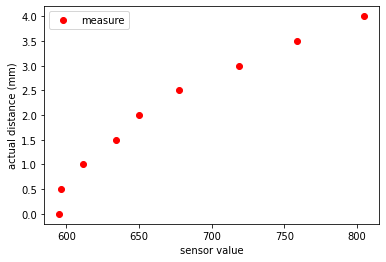

In [6]:
'''
# Psudo measurements are derived from the following code:
actual_distance = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4] 
sensor_values = []
a = 12.1645
b = 4.0087
c = 594.6
for i in actual_distance:
    sensor_values.append(round(i*i* a + i*b + c +np.random.normal(0, 3),1))
print (sensor_values)
'''

actual_distance = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4] 
sensor_values = [595.3, 596.6, 611.5, 634.0, 650.2, 677.4, 719.0, 758.5, 804.5]

coe_1 = -0.00006811
coe_2 = 0.11226564
coe_3 = -42.34817544

plt.plot(sensor_values, actual_distance, 'ro', label='measure')
plt.xlabel('sensor value')
plt.ylabel('actual distance (mm)')
plt.legend()
plt.show()

### Question: what is the the relation between the actual distance and the sensor value?

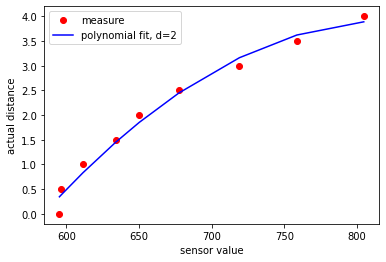

In [7]:
coe_1 = -0.00006811
coe_2 = 0.11226564
coe_3 = -42.34817544

abline_values = [coe_1 * i*i + coe_2 *i + coe_3 for i in sensor_values]
plt.plot(sensor_values, actual_distance, 'ro', label='measure')
plt.plot(sensor_values, abline_values, 'b', label='polynomial fit, d=2')
plt.xlabel('sensor value')
plt.ylabel('actual distance')
plt.legend()
plt.show()

### Question: what is the actual distance if the sensor value is 750?

In [8]:
## TODO: 
new_sensor_value = 750
estimate_distance =  coe_1 * new_sensor_value*new_sensor_value + coe_2 *new_sensor_value + coe_3  
print (estimate_distance)

3.539179560000008


**One of the task in the assignment will require you to find the transfer function.**

## 0.3 Signal processor  <a id="03">

### Noise: An unwanted disturbance (or fluctuation) in an electronic signal
<img src="images/noise.png" width=400>

If your situation is precise but not accurate, you need to **re-calibrate (re-learn the transfer function)** your sensor.

If your situation is accurate but not presice, you need to remove the noise in your measurements.

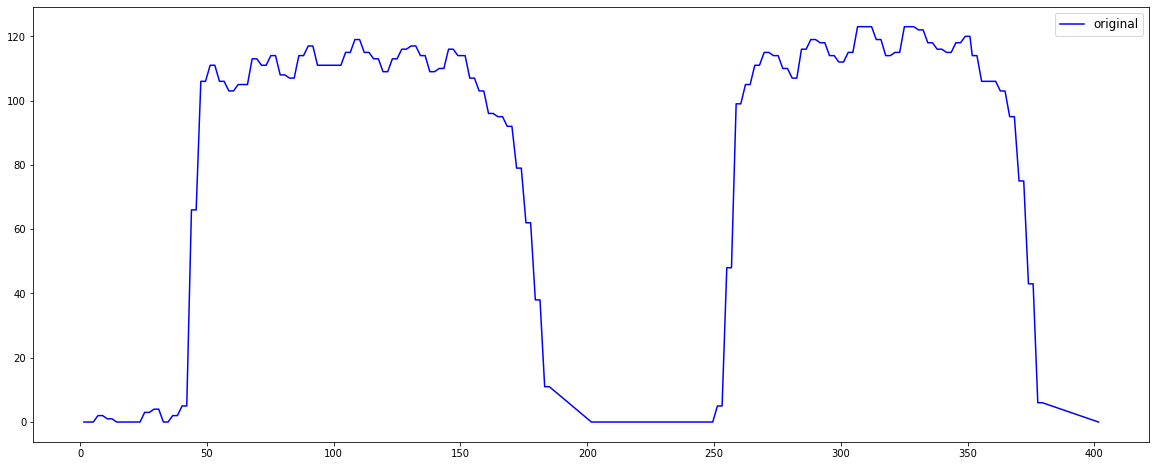

In [9]:
# Reading the file
df = pd.read_csv('files/Noise.csv', header=None)
timestamps = df[0].tolist()
signal = df[1].tolist()

plt.figure(figsize=(20,8))
plt.plot(timestamps[0:200], signal[0:200], 'b-', label="original")
plt.legend(fontsize='large')
plt.show()

### Moving average filter

<img src="images/moving_average.png" width=600>

In [10]:
def moving_average(x, w):
    # w is the window size
    return np.convolve(x, np.ones(w), 'full') / w

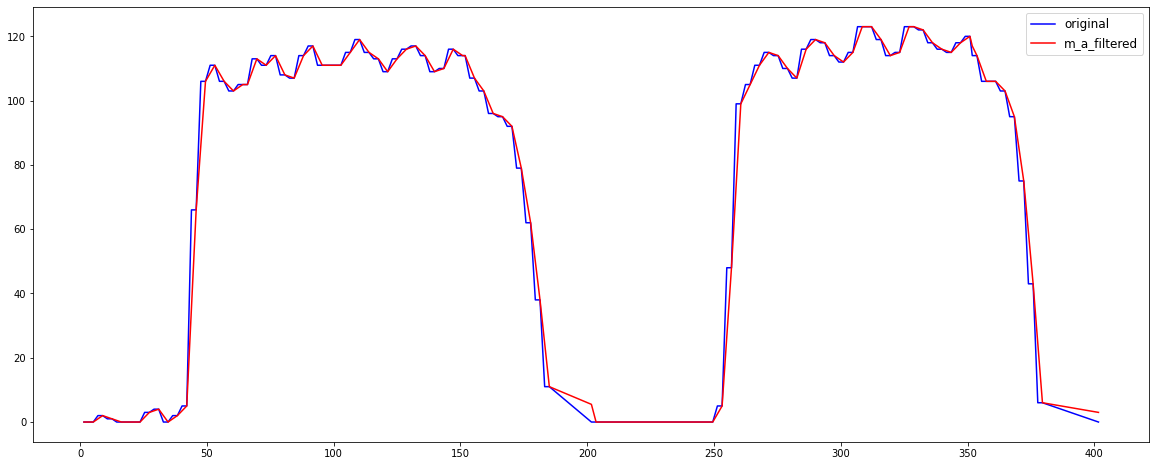

In [11]:
ma_signal = moving_average(signal, 2)  # Window size set to 2

plt.figure(figsize=(20,8))
plt.plot(timestamps[0:200], signal[0:200], 'b-', label="original")
plt.plot(timestamps[0:200], ma_signal[0:200], 'r-', label="m_a_filtered")
plt.legend(fontsize='large')
plt.show()

# TODO: change the window size to 3, 5, and 10 and observe the differences

### Question: what will happen when you increase the window size?

###  1€ Filter: A Simple Speed-based Low-pass Filter

<img src="images/1euro.png" width=500>

**Try online demo [here](http://cristal.univ-lille.fr/~casiez/1euro/InteractiveDemo/).**

In [12]:
# Implementation of One Euro Filter, no need to do anything here
class LowPassFilter(object):

    def __init__(self, alpha):
        self.__setAlpha(alpha)
        self.__y = self.__s = None

    def __setAlpha(self, alpha):
        alpha = float(alpha)
        if alpha<=0 or alpha>1.0:
            raise ValueError("alpha (%s) should be in (0.0, 1.0]"%alpha)
        self.__alpha = alpha

    def __call__(self, value, timestamp=None, alpha=None):        
        if alpha is not None:
            self.__setAlpha(alpha)
        if self.__y is None:
            s = value
        else:
            s = self.__alpha*value + (1.0-self.__alpha)*self.__s
        self.__y = value
        self.__s = s
        return s

    def lastValue(self):
        return self.__y

# ----------------------------------------------------------------------------

class OneEuroFilter(object):

    def __init__(self, freq, mincutoff=1.0, beta=0.0, dcutoff=1.0):
        if freq<=0:
            raise ValueError("freq should be >0")
        if mincutoff<=0:
            raise ValueError("mincutoff should be >0")
        if dcutoff<=0:
            raise ValueError("dcutoff should be >0")
        self.__freq = float(freq)
        self.__mincutoff = float(mincutoff)
        self.__beta = float(beta)
        self.__dcutoff = float(dcutoff)
        self.__x = LowPassFilter(self.__alpha(self.__mincutoff))
        self.__dx = LowPassFilter(self.__alpha(self.__dcutoff))
        self.__lasttime = None
        
    def __alpha(self, cutoff):
        te    = 1.0 / self.__freq
        tau   = 1.0 / (2*math.pi*cutoff)
        return  1.0 / (1.0 + tau/te)

    def __call__(self, x, timestamp=None):
        # ---- update the sampling frequency based on timestamps
        if self.__lasttime and timestamp:
            self.__freq = 1.0 / (timestamp-self.__lasttime)
        self.__lasttime = timestamp
        # ---- estimate the current variation per second
        prev_x = self.__x.lastValue()
        dx = 0.0 if prev_x is None else (x-prev_x)*self.__freq # FIXME: 0.0 or value?
        edx = self.__dx(dx, timestamp, alpha=self.__alpha(self.__dcutoff))
        # ---- use it to update the cutoff frequency
        cutoff = self.__mincutoff + self.__beta*math.fabs(edx)
        # ---- filter the given value
        return self.__x(x, timestamp, alpha=self.__alpha(cutoff))

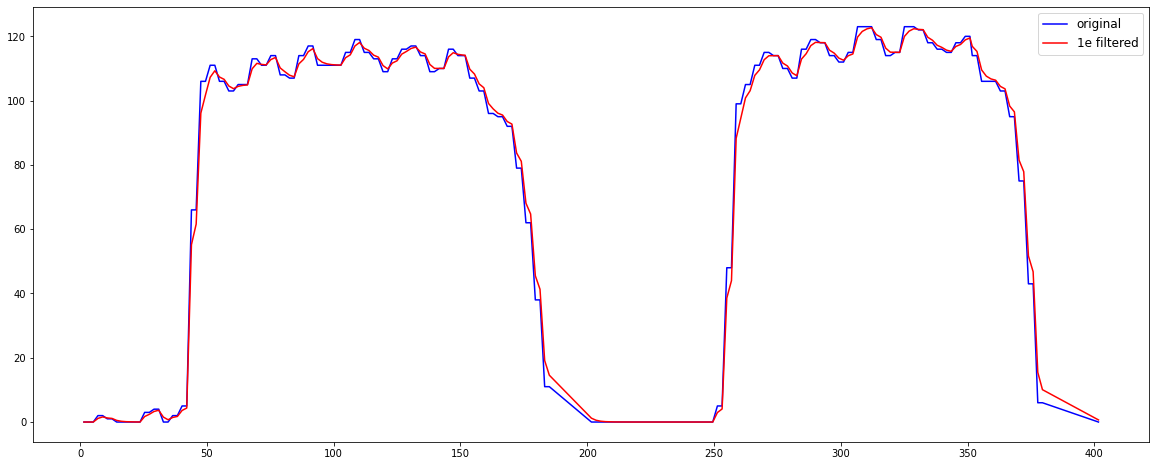

In [13]:
# Tuning the values of mincutoff and beta only.

init_frequency = (timestamps[-1] - timestamps[0])/len(timestamps)
config = {
'freq': init_frequency, # This value is correct, no need to change it!
'mincutoff': 0.1,       # TODO: FIX ME
'beta': 0.01,           # TODO: FIX ME
'dcutoff': 1.0          # This value is already fine, no need to change it!
}

one_e_filter = OneEuroFilter(**config)

# Filtering the data and store them into f_list
one_e_list = []
for i in range(len(timestamps)):
    f = one_e_filter(signal[i], timestamps[i])
    one_e_list.append(f)
    
# Plotting the first 200 points 
plt.figure(figsize=(20,8))
plt.plot(timestamps[0:200], signal[0:200], 'b-', label="original")
plt.plot(timestamps[0:200], one_e_list[0:200], 'r-', label="1e filtered")
plt.legend(fontsize='large')
plt.show()

## 0.4 Recognizer <a id="04">

### A typical machine-learning-based recognition flow:

<img src="images/ml-recognizer.png"  width=700>

### Example: Hand gesture recognition with leap motion and kinect devices 
Paper: https://lttm.dei.unipd.it//nuovo/Papers/14_ICIP_leap.pdf (citation: 384)

Dataset download: https://lttm.dei.unipd.it//downloads/gesture/

### Method
<img src="images/ml-pipeline.png" width=600>

### Dataset
<img src="images/dataset.png" width=600>
<img src="images/original-data.png" width=600>

Since we only use it as a quick example, let's just use one part of the features used in the paper; specifically, let's only take the finger distances for training.

### Step 1 & 2: read sensor data and engineer the features (only finger distances)

In [14]:
def distance(list1, list2):
    """Distance between two vectors."""
    squares = [(p-q) ** 2 for p, q in zip(list1, list2)]
    return sum(squares) ** .5

all_p_data = glob.glob("files/Gesture_set/*")
x_all = []
y_all = []

for i in all_p_data:
    all_folders = glob.glob(i+"/*")
    for j in all_folders:
        files = glob.glob(j+"/*")
        for k in files:
            ## appending the label
            if ('G5' in k):
                y_all.append(5)
            else:
                y_all.append(4)
                
            ## Start reading file
            
            this_fingertip_positions = []
            this_palm_position = []
            with open(k, newline='') as csvfile:
                for row in csvfile:
                    row = row.split(',')
                    if (row[0] == 'FingertipsPositions'):
                        for l in row[1:]:
                            this_fingertip_positions.append(float(l))
                    if (row[0] == 'PalmPositionRefined'):
                        for l in row[1:]:
                            this_palm_position.append(float(l))
            
            ## Feature engineering (I only take finger-to-palm distances into account)
            distances = [distance(this_fingertip_positions[0:3],this_palm_position),
                        distance(this_fingertip_positions[3:6],this_palm_position),
                        distance(this_fingertip_positions[6:9],this_palm_position),
                        distance(this_fingertip_positions[9:12],this_palm_position),
                        distance(this_fingertip_positions[12:15],this_palm_position)]

            middle_finger = distances[2]
            n_distances = [x / middle_finger for x in distances]
            x_all.append(n_distances)
            
x_all = np.array(x_all)
y_all = np.array(y_all)

### Step 3: Check the data and split them into training and testing datasets

- **Training Dataset:** The sample of data used to fit the model.
- **Test Dataset:** The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.


In [18]:
print (x_all)
print (y_all)

X_train_hand, X_test_hand, y_train_hand, y_test_hand = train_test_split(x_all, y_all, test_size=0.2, random_state=42)

[[0.77076936 0.73414542 1.         0.32848204 0.95355073]
 [0.74424402 0.52561553 1.         0.25952359 0.6872275 ]
 [0.69420908 0.55709541 1.         0.2197127  0.69689249]
 ...
 [0.92329661 0.74011952 1.         0.37112514 0.83460949]
 [0.7652666  0.62670634 1.         0.32972713 0.71309824]
 [0.72014481 0.79489996 1.         0.23640176 0.93945525]]
[5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4
 4 4 4 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 4 4 4 4
 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 4
 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5
 5 5 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5
 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 5 5
 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4
 4 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4]


### Step 4: train with a SVM classifier

A support vector machine (SVM) is a **supervised** machine learning model that handles two-group classification problems. An SVM model needs a set of labeled training data for learning.

**Discussion:** What is supervised learning?

<img src="images/svm.png">

Note: there are [other classifiers](https://medium.com/@jorgesleonel/classification-methods-in-machine-learning-58ce63173db8) but we won't cover here.

In [19]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train_hand, y_train_hand)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

### Step 5: evaluate with the testing dataset

In [20]:
y_pred = clf.predict(X_test_hand)
print ('accuracy = ', accuracy_score(y_test_hand, y_pred))
print ('classification report: ')
print (classification_report(y_test_hand, y_pred))
print ('confusion matrix: ')
print (confusion_matrix(y_test_hand, y_pred))

accuracy =  0.6607142857142857
classification report: 
              precision    recall  f1-score   support

           4       0.61      0.68      0.64        25
           5       0.71      0.65      0.68        31

    accuracy                           0.66        56
   macro avg       0.66      0.66      0.66        56
weighted avg       0.67      0.66      0.66        56

confusion matrix: 
[[17  8]
 [11 20]]


### Limitation of ML-based recognizer

- Feature engineering needs a lot of effort! If you don't do it well, the redundant features will worsen the results.
- Feature engineering requires specific knowledge of the domain.
- Feature engineering takes too many human decisions so it introduces biases, too!
- Traditional ML is hard to be scaled up for high-dimensional input (e.g., images, videos, voice).

**Optional reading: [Principal Component Analysis (PCA)](https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad) is a common approach to reduce the dimensionality of the input space.**

<a href="#outline">Back to top!</a></li>

# Part 1: CNN, fully connected layers and their application<a id="1">

<div class="alert alert-block alert-success">
<h2><img src="images/goal.png" width=20, align="left">&nbsp;Learning objectives of part 1</h2>
    <br>Learn to:
    <ul>
        <li>build a model using CNN & fully connected layers
        <li>tune the model to achieve reliable detection
        <li>have basic understanding of the state-of-the-art object detection algorithms
    </ul>
</div>

## 1.1 Fully connected layers<a id="11">


In [50]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/aircAruvnKk" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

### Fully connected layers

<img src="images/dense-layer.png">

### Step 1: Data preparation

Let's take the same dataset (paper: [Hand gesture recognition with leap motion and kinect devices](https://lttm.dei.unipd.it//nuovo/Papers/14_ICIP_leap.pdf)), but use with fully connected layers model.

Dataset download: https://lttm.dei.unipd.it//downloads/gesture/

### Dataset
<img src="images/original-data.png" width=600>


In [21]:
all_p_data = glob.glob("files/Gesture_set/*")
x_all = []
y_all = []

for i in all_p_data:
    all_folders = glob.glob(i+"/*")
    for j in all_folders:
        files = glob.glob(j+"/*")
        for k in files:
            ## appending the label
            if ('G5' in k):
                y_all.append(1)
            else:
                y_all.append(0)
                
            ## Start reading file
            ## Just appending everything into the input space (X)
            this_x = []
            with open(k, newline='') as csvfile:
                for row in csvfile:
                    row = row.split(',')
                    for l in row[1:]:
                        this_x.append(float(l))
            x_all.append(this_x)
            
x_all = np.array(x_all)
y_all = np.array(y_all)

### Step 2: Check the data and split them into training and testing datasets

In [22]:
print (x_all)
print (y_all)

X_train_hand2, X_test_hand2, y_train_hand2, y_test_hand2 = train_test_split(x_all, y_all, test_size=0.2, random_state=42)

print (X_train.shape)

[[  3.       103.69     105.857    ...  10.2734     1.44337    0.506716]
 [  2.       104.819    107.022    ... -49.3036   119.76       0.999901]
 [  2.       105.742    107.527    ...  28.5469    15.4301     0.988917]
 ...
 [  3.        89.8732   113.014    ...  18.2536    -1.18371    0.49824 ]
 [  2.        86.783    113.38     ...  40.2265   -10.1767     0.787761]
 [  3.        85.0574   110.245    ...  13.5174    53.7186     0.976245]]
[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 

### Step 3: Build the model

Check how to use Dense layers [here](https://keras.io/api/layers/core_layers/dense/).

In [23]:
## TODO: Modify the model to achieve > 90% evaluation accuracy 

dense_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'), # Hidden layer
  tf.keras.layers.Dense(128, activation='relu'), # Hidden layer
  tf.keras.layers.Dense(64, activation='relu'), # Hidden layer
  tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
  tf.keras.layers.Dropout(0.1),                  # Normalization layer
  tf.keras.layers.Dense(2, activation='softmax')# There are 10 classes
])

dense_model.build((1,69))
dense_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  8960      
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  8256      
_________________________________________________________________
dense_3 (Dense)              multiple                  2080      
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_4 (Dense)              multiple                  66        
Total params: 35,874
Trainable params: 35,874
Non-trainable params: 0
____________________________________________________

In [24]:
dense_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Step 4: Fit the model

In [25]:
dense_model.fit(X_train_hand2, y_train_hand2, epochs=10) #X_ to denote data observations, y_ to denote labels

Epoch 1/10
7/7 [==============================] - 0s 1ms/step - loss: 7.8842 - accuracy: 0.5179
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 1.9099 - accuracy: 0.7500
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 0.7009 - accuracy: 0.8482
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8839
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.9196
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 0.1056 - accuracy: 0.9464
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 0.0834 - accuracy: 0.9643
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 0.0452 - accuracy: 0.9777
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9911
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 0.0709 - accuracy: 0.9732


### Step 5: Evalutate (where magic happens!)

In [26]:
dense_model.evaluate(X_test_hand2, y_test_hand2)

2/2 [==============================] - 0s 1ms/step - loss: 0.1238 - accuracy: 0.9464


[0.1237812265753746, 0.9464285969734192]

**Discussion:** 

- Do you achieve > 90% accuracy?
- If the training accuracy is higher than the evaluation accuracy, what does that mean?

<img src="images/overfit.png">

## 1.2 Convolutional Neural Network<a id="12">

### CNN architecture
<img src="images/cnn.jpg" width=600>

### Motivation: traditional computer vision pipeline

<img src="images/traditionalcv.png" width=700>

- Denoising: High-pass & low-pass filters
- Corner/edge detector: Harris point detector, Canny edge detector, Laplacian of Gaussian ...
- Local feature descriptor: Scale-invariant feature transform (SIFT), Histogram of oriented gradients (HOG), Viola/Jones Face Detector, ...
- Recognition algorithm: Bag-of-word model (GoW), K-means clustering, vocabulary tree/inverted index, machine learning (classifier), ...

### MNIST as an example
<img src="images/mnist_plot-800x600.png" width=400>

### Step 1: Data preparation

In [580]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
num_classes = y_test.shape[1]

print(X_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


### Step 2: Ceate your model

In [581]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size = (5, 5), input_shape=(28, 28, 1), activation='relu'), # Hidden layer
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')# There are 10 classes
])

cnn_model.summary()

Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_254 (Dense)            (None, 128)               589952    
_________________________________________________________________
dense_255 (Dense)            (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
_________________________________________________________________


In [582]:
cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Step 3: Train the model

In [583]:
cnn_model.fit(X_train, y_train, epochs=5) #X_ to denote data observations, y_ to denote labels

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1313 - accuracy: 0.9607
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0443 - accuracy: 0.9864
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0286 - accuracy: 0.9905
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0193 - accuracy: 0.9939
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0142 - accuracy: 0.9952


### Step 4: Evalutate the model

In [584]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0359 - accuracy: 0.9878


[0.03593611717224121, 0.9878000020980835]

## 1.3 Advanced algorithms<a id="13">

In the previous example, every image is cropped so that there is only one object, placed in the center, with very similar scale and rotation, to identify from one image. However, in practice, we are much more challenges:
- Variable Number of Objects
- Multiple Spatial Scales and Aspect Ratios
- Limited Data
- Speed for Real-Time detection

**Discussion:** How will you design an algorithm to automatically detect where are the objects in an image? You can imagine a big black background in which digits (MNIST) can be anywhere.


### R-CNN (2014)

<img src="images/r-cnn1.png">

Key concept: using selective search to extract just 2000 regions from the image, then feed these 2000 regions into CNN.

Selective Search:
1. Generate initial sub-segmentation, we generate many candidate     regions
2. Use greedy algorithm to recursively combine similar regions into larger ones 
3. Use the generated regions to produce the final candidate region proposals 

Problems with R-CNN

- It still takes a huge amount of time to train the network.
- It cannot be implemented real time as it takes around 47 seconds for each test image.
- The selective search algorithm is a fixed algorithm. This could lead to the generation of bad candidate region proposals.

You can find the original paper [here](https://arxiv.org/abs/1311.2524).

---
### Fast R-CNN (2015)

<img src="images/fast-r-cnn.png">

Improvement: 
- instead of feeding the region proposals to the CNN, we feed the input image to the CNN to generate a convolutional feature map. 
- From the convolutional feature map, we identify the region of proposals

Limitation:
- Still require selective algorithm to find the ROIs from the feature map.

You can find the original paper [here](https://arxiv.org/abs/1504.08083).

---
### Faster R-CNN (2016)

<img src="images/faster-r-cnn.png" width=600>

Improvement: 
- The image is provided as an input to a convolutional network which provides a convolutional feature map. 
- Instead of using selective search algorithm on the feature map to identify the region proposals, a separate network is used to predict the region proposals.

Limitation:
- Still require regional proposals.

You can find the original paper [here](https://papers.nips.cc/paper/2015/file/14bfa6bb14875e45bba028a21ed38046-Paper.pdf).

<img src="images/rcnn-com.png" width=600>

---
### YOLO: You Only Look Once (2015)


In [30]:

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/LOyHEZg5iAk" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

<img src="images/yolo1.png" width=600>
Core concept: 
YOLO doesn’t search for interested regions in the input image that could contain an object, instead it splits the image into cells, typically 19x19 grid. Each cell is then responsible for predicting K bounding boxes.


Each bounding box can be described using four descriptors:
1. Center of the box (bx, by)
2. Width (bw)
3. Height (bh)
4. Value c corresponding to the class of an object
<img src="images/yolo2.png" >

To resolve this problem of bounding boxes that are very close each other, YOLO performs IoU (Intersection over Union) to keep the highest class probability among them (Non-max suppression).

<img src="images/yolo3.png" >

<img src="images/yolo4.png" >

Improvement: 
- YOLO is way much faster faster(45 frames per second for v1, > 60 fps for later versions) than other object detection algorithms.

Limitation:
- Hard to detect very small objects.

<img src="images/yolovsrcnn.png" >


You can find the papers here:
- [YOLO v1](https://arxiv.org/abs/1506.02640)
- YOLO v2
- YOLO 9000
- YOLO v3
- YOLO v4

<a href="#outline">Back to top!</a></li>

# Part 2: RNN, LSTM and application<a id="2">

<div class="alert alert-block alert-success">
<h2><img src="images/goal.png" width=20, align="left">&nbsp;Learning objectives of part 2</h2>
    <br>Learn to:
    <ul>
        <li>have the basic concept of RNN and LSTM
        <li>use Keras to quickly build LSTM models
    </ul>
</div>

## 2.1 From Recurrent Neural Networks (RNN) to Long-short Term Memory (LSTM) <a id="21">

### The basic form of RNN

Humans don’t start their thinking from scratch every second. As you read this essay, you understand each word based on your understanding of previous words. You don’t throw everything away and start thinking from scratch again. Your thoughts have persistence. Traditional neural networks can’t do this, and it seems like a major shortcoming. For example, imagine you want to classify what kind of event is happening at every point in a movie. It’s unclear how a traditional neural network could use its reasoning about previous events in the film to inform later ones.

Recurrent neural networks address this issue. They are networks with loops in them, allowing information to persist.

<img src="images/rnn1.png" width=600>

In the above diagram, a chunk of neural network, A, looks at some input xt and outputs a value ht. A loop allows information to be passed from one step of the network to the next.


**Discussion:** What are the potential applications of RNN?

### Limitation of simple RNN

The long-term dependency is not desirable sometimes. 

<img src="images/rnn2.png" width=600>

<img src="images/rnn3.png" width=600>

What should we do? A network that is capable of "forgetting".

### Long-short term memory (LSTM) networks

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

<img src="images/lstm1.png" width=600>

All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer (above).

<img src="images/lstm2.png" width=600>

LSTMs also have this chain like structure, but the repeating module has a different structure. Instead of having a single neural network layer, there are four, interacting in a very special way.

### Core concept of LSTM

<img src="images/lstm3.png">

The key to LSTMs is the cell state, the horizontal line running through the top of the diagram. It runs straight down the entire chain, with only some minor linear interactions. It’s very easy for information to just flow along it unchanged.

<img src="images/gate.png" width=100>

Gates are a way to optionally let information through. They are composed out of a sigmoid neural net layer and a pointwise multiplication operation.

**Discussion:** Why use sigmoid as the activation function?

### Major GATES in LSTM


#### 1. Forget gate layer:
The first step in our LSTM is to decide what information we’re going to throw away from the cell state. This decision is made by a sigmoid layer called the “forget gate layer.” 

<img src="images/lstm4.png">



#### 2. Input gate layer:
The next step is to decide what new information we’re going to store in the cell state. This has two parts. First, a sigmoid layer called the “input gate layer” decides which values we’ll update. Next, a tanh layer creates a vector of new candidate values, Ct, that could be added to the state. In the next step, we’ll combine these two to create an update to the state.

<img src="images/lstm5.png">

#### 3. Update Ct based on forget gate and input gate

<img src="images/lstm7.png">

#### 4. Determine the output

<img src="images/lstm6.png">


**Optional reading:** [This blog post](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) provides a clear overview.


## 2.2 LSTM using Keras <a id="22">

In [4]:
HTML('<img src="https://media.giphy.com/media/Aw0kXVxZDbkTC/giphy.gif">')

Here are several steps we have to follow before the actual training of our model:
- Split the text by chunks of words: We would like to remove all unnecessary symbols from the text and work only with separate words.


- Encode the words from categorical to numerical variables: The machine cannot understand words and therefore it needs numerical values so as to make it easier for the machine to process the data. To apply any type of algorithm to the data, we need to convert the categorical data to numbers. To achieve this, one hot ending is one way as it converts categorical variables into binary vectors.

<img src="images/onehot.jpg">


Additionally, we will use **Pickle** in this example. Pickle serializing and de-serializing a Python object structure. Any object in python can be 'pickled' so that it can be saved on disk. What pickle does is that it serializes the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

### Step 1. Data preparation


In [49]:
# Define a fixed sequence length for training.
SEQUENCE_LENGTH = 40

# The saved model file will be named like the dataset file.
dataset_file = 'files/animal-farm.txt'
# Do some text preprocessing.
text_source = open(dataset_file).read().lower().replace('\n', ' ') # merge all the lines
text_source = ' '.join(text_source.split()) # Remove redundant space
print (text_source[0:100])

# Create vocabulary. We need to look up chars by index and vice versa.
chars = sorted(list(set(text_source)))
char_indices = dict((c, i) for i, c in enumerate(chars))

# Create text chunks and their expected prediction.
sentences = []
char_step = 3
next_char = []
for i in range(0, len(text_source) - SEQUENCE_LENGTH, char_step):
    sentences.append(text_source[i: i + SEQUENCE_LENGTH])
    next_char.append(text_source[i + SEQUENCE_LENGTH])

print (sentences[0])
print (next_char[0:3])
    
# Create 1-hot encoded training data.
X = np.zeros((len(sentences), SEQUENCE_LENGTH, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_char[i]]] = 1

print ("t's one hot encoding: \n", X[0][0])
print ("space key's ont hot encoding: \n", y[0])

title: animal farm author: george orwell (pseudonym of eric blair) (1903-1950) * a project gutenberg
title: animal farm author: george orwell
[' ', 's', 'd']
t's one hot encoding: 
 [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False]
space key's ont hot encoding: 
 [ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]


### Step 2. Create a model and train the model

In [26]:
# Define the model.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(SEQUENCE_LENGTH, input_shape=(SEQUENCE_LENGTH, len(chars))))
model.add(tf.keras.layers.Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Train and save the model.
model.fit(X, y, validation_split=0.2, batch_size=128, epochs=20)
model.save('{}.h5'.format(dataset_file))
# Save also the vocabulary used to train the model.
with open('{}.voc'.format(dataset_file), 'wb') as f:
    pickle.dump(chars, f, protocol=2)

Epoch 1/20
353/353 [==============================] - 8s 23ms/step - loss: 2.9194 - accuracy: 0.1850 - val_loss: 2.7703 - val_accuracy: 0.2094
Epoch 2/20
353/353 [==============================] - 8s 22ms/step - loss: 2.5980 - accuracy: 0.2874 - val_loss: 2.4702 - val_accuracy: 0.3182
Epoch 3/20
353/353 [==============================] - 8s 22ms/step - loss: 2.3859 - accuracy: 0.3308 - val_loss: 2.3328 - val_accuracy: 0.3318
Epoch 4/20
353/353 [==============================] - 8s 24ms/step - loss: 2.2907 - accuracy: 0.3455 - val_loss: 2.2613 - val_accuracy: 0.3565
Epoch 5/20
353/353 [==============================] - 9s 24ms/step - loss: 2.2317 - accuracy: 0.3598 - val_loss: 2.2045 - val_accuracy: 0.3657
Epoch 6/20
353/353 [==============================] - 8s 24ms/step - loss: 2.1825 - accuracy: 0.3720 - val_loss: 2.1586 - val_accuracy: 0.3744
Epoch 7/20
353/353 [==============================] - 8s 22ms/step - loss: 2.1391 - accuracy: 0.3822 - val_loss: 2.1210 - val_accuracy: 0.3852

### Step 3. Evaluate the model

In [27]:
### Create dictionaries for characters and the model.

MODEL = None
CHARS = None
char_indices, indices_char = {}, {}

In [28]:
###  One-hot encoding of the test sample of the text.

def encode_input(text):
    x = np.zeros((1, SEQUENCE_LENGTH, len(CHARS)))
    for t, char in enumerate(text.lower()):
        x[0, t, char_indices[char]] = 1
    return x

### Take elements which occures the most often in the observed data.

def sample(preds, top_n=1):
    preds = np.asarray(preds)
    # Extract the top_n elements with highest probability.
    return list(heapq.nlargest(top_n, range(len(preds)), preds.take))

### We would like to predict the extension of the sentence until we meet a space.

def predict_completion(text):
    completion = ''
    while True:
        x = encode_input(text)
        preds = MODEL.predict(x).flatten()
        next_index = sample(preds).pop()
        next_char = indices_char[next_index]
        completion += next_char
        # Keep predicting until the end token.
        if next_char == ' ':
            return completion
        # Update source text.
        text = text[1:] + next_char
        
### Transforming numeric representation back to words using saved indexes of the characters.
    
def predict_completions(text, n_completions=3):
    x = encode_input(text)
    preds = MODEL.predict(x).flatten()
    next_indices = sample(preds, n_completions)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

In [29]:
if __name__ == '__main__':
    dataset_file = 'files/animal-farm.txt'

    MODEL = tf.keras.models.load_model('{}.h5'.format(dataset_file))
    with open('{}.voc'.format(dataset_file), 'rb') as f:
        CHARS = pickle.load(f)

    char_indices = dict((c, i) for i, c in enumerate(CHARS))
    indices_char = dict((i, c) for i, c in enumerate(CHARS))

    # Our input sentences must have the same length used in training.
    seq = "One day, Julia secretly hands Winston a note confessing her love for him"
    seq = seq[0:SEQUENCE_LENGTH]

    completions = predict_completions(seq, n_completions=4)
    print(seq)
    print('---')
    for suggestion in completions:
        print(seq + suggestion)

One day, Julia secretly hands Winston a 
---
One day, Julia secretly hands Winston a the 
One day, Julia secretly hands Winston a dome 
One day, Julia secretly hands Winston a for 
One day, Julia secretly hands Winston a was 


<a href="#outline">Back to top!</a></li>

# Part 3: Autoencoder and application<a id="3">

<div class="alert alert-block alert-success">
<h2><img src="images/goal.png" width=20, align="left">&nbsp;Learning objectives of part 3</h2>
    <br>Learn to:
    <ul>
        <li>have the basic concept of autoencoder
        <li>use Keras to quickly build autoencoder models: compression and clustering
    </ul>
</div>

## 3.1 Overview of autoencoder <a id="31">

### Basic concept

<img src="images/autoencoder1.jpg">

"Autoencoding" is a data compression algorithm where the compression and decompression functions are 1) data-specific, 2) lossy, and 3) learned automatically from examples rather than engineered by a human. Additionally, in almost all contexts where the term "autoencoder" is used, the compression and decompression functions are implemented with neural networks.

1. Autoencoders are **data-specific**, which means that they will only be able to compress data similar to what they have been trained on. This is different from, say, the MPEG-2 Audio Layer III (MP3) compression algorithm, which only holds assumptions about "sound" in general, but not about specific types of sounds. An autoencoder trained on pictures of faces would do a rather poor job of compressing pictures of trees, because the features it would learn would be face-specific.

2. Autoencoders are **lossy**, which means that the decompressed outputs will be degraded compared to the original inputs (similar to MP3 or JPEG compression). This differs from lossless arithmetic compression.

3. Autoencoders are **learned automatically** from data examples, which is a useful property: it means that it is easy to train specialized instances of the algorithm that will perform well on a specific type of input. It doesn't require any new engineering, just appropriate training data.

**Discussion:** What is the loss function given it's a supervised learning?

As visualized above, we can take an unlabeled dataset and frame it as a supervised learning problem tasked with outputting x̂, a reconstruction of the original input x. This network can be trained by minimizing the reconstruction error, L(x,x̂).

<img src="images/bottleneck.png" width=600>

Specifically, we'll design a neural network architecture such that we impose a bottleneck in the network which forces a compressed knowledge representation of the original input.

**Discussion:** What will happen if the bottleneck is the same size as the input/output layer?

### Two kinds of autoencoder

### 1. Undercomplete autoencoder

<img src="images/autoencoder2.png" width=600>

This can be thought of as a more powerful (nonlinear) generalization of PCA. Whereas PCA attempts to discover a lower dimensional hyperplane which describes the original data, autoencoders are capable of learning nonlinear manifolds (a manifold is defined in simple terms as a continuous, non-intersecting surface). 

<img src="images/pcavsae.png" width=300>

### 2. Sparse autoencoders

<img src="images/autoencoder3.png" width=600>

### Applications

1. Dimensionality Reduction
2. Image Compression
3. Feature Extraction
4. Image Denoising

<img src="images/denoising_ae.png">

## 3.2 Compressing images from Fashion-MNIST dataset <a id="32">

<img src="images/fashion-mnist.png" width=500>

We have already met MNIST dataset. Some researches believe that it is too easy and overused. So, here Fashion-MNIST is a dataset of Zalando’s article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28×28 grayscale image, associated with a label from 10 classes.

### Step 1. Data preparation

In [31]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [32]:
# normalize our data.
X_train, X_test = X_train / 255.0, X_test / 255.0

In this example, we introduce "validation dataset"
- **Training Dataset:** The sample of data used to fit the model.
- **Validation Dataset:** The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. Usually for avoiding overfitting.

- **Test Dataset:** The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

<img src="images/datasets.png" width=500>

In [33]:
# Split train partition again, so that we can use a subset for validation.
num_val_imgs = 0.1 * len(X_train)
num_val_imgs = int(num_val_imgs) 

X_train, X_valid = X_train[:-num_val_imgs], X_train[-num_val_imgs:]
y_train, y_valid = y_train[:-num_val_imgs], y_train[-num_val_imgs:]

In [34]:
#  Specify width and height.
#  in this exercise fully connected neural layers are used, 
#  so we need to specify only width and height for each of the images.

IMG_SHAPE = (28, 28)

### Step 2. Create a model

What makes a autoencoder?
- encoding function
- decoding function 
- loss function

In a fully-connected neural network architecture, we connect every pixel from the input image example to some number of hidden neurons. In autoencoders, the number of neurons in the hidden layer(s) is typically smaller than the number of input features.

In [35]:
 # Create encoder network.
encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=IMG_SHAPE),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
])

In [36]:
 # Create decoder network.
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=encoder.output_shape),
    tf.keras.layers.Dense(IMG_SHAPE[0] * IMG_SHAPE[1], activation='sigmoid'),
    tf.keras.layers.Reshape(IMG_SHAPE),
])

In [37]:
# Create autoencoder model, compile it, and train it.
autoencoder = tf.keras.Sequential([encoder, decoder])
autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 50)                83550     
_________________________________________________________________
sequential_3 (Sequential)    (None, 28, 28)            84284     
Total params: 167,834
Trainable params: 167,834
Non-trainable params: 0
_________________________________________________________________


### Step 3. model training

In [38]:
def rec_acc(y_true, y_pred):
    return tf.keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [39]:
autoencoder.compile(loss='mse', optimizer='adam', metrics=['mse', rec_acc])
autoencoder.fit(X_train, X_train, epochs=2, validation_data=(X_valid, X_valid))

Epoch 1/2
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0247 - mse: 0.0247 - rec_acc: 0.9074 - val_loss: 0.0167 - val_mse: 0.0167 - val_rec_acc: 0.9281
Epoch 2/2
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0150 - mse: 0.0150 - rec_acc: 0.9332 - val_loss: 0.0143 - val_mse: 0.0143 - val_rec_acc: 0.9330


You can see that after 2 epochs, the autoencoder seems to reach a stable train/test loss value of about 0.01.

Let's see an overview of our network architectures.

In [40]:
encoder.summary()
decoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
Total params: 83,550
Trainable params: 83,550
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              multiple                  5100      
_________________________________________________________________
dense_5 (Dense)              multiple                  79184     
____________________________

### 4. Model testing

Since we work with images, it is very simple to check how good our model is. Let's pick a random item from the data we have.

In [41]:
# This function selects one item at random from a list.
def randselect(arr, num=1):
    num_samples = arr.shape[0]
    rand_index = np.random.choice(num_samples, num, replace=False)
    return arr[rand_index]

In [42]:
def show_reconstructions(model, images, num_images=10):
    samples = images[:num_images]
    # Better: select `num_images` at random.
    samples = randselect(images, num_images)
    reconstructions = model.predict(samples)
    # Allocate output fig size, in inches.
    fig = plt.figure(figsize=(num_images, num_images//3))
    for i in range(num_images):
        img_src = samples[i]
        img_rec = reconstructions[i]
        # Plot original images in the top row.
        plt.subplot(2, num_images, 1 + i)
        plt.axis('off')
        plt.imshow(img_src, cmap='binary')
        # Plot reconstructed images in the bottom row.
        plt.subplot(2, num_images, 1 + num_images + i)
        plt.axis('off')
        plt.imshow(img_rec, cmap='binary')
    fig.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


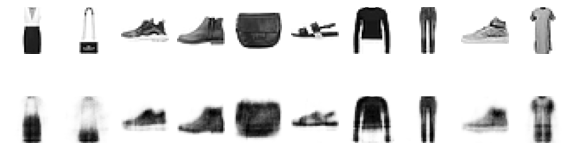

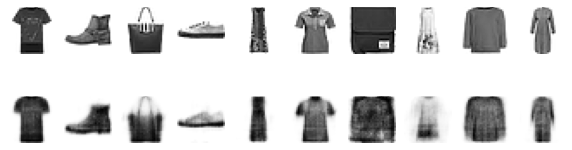

In [45]:
show_reconstructions(autoencoder, X_valid)
show_reconstructions(autoencoder, X_test)

 Rows 1 and 2 are original and reconstructed images form the validation data. Rows 3 and 4 are original and reconstructed images form the test (unseen) data, that's why they look a bit more blurry.

### 5. Save the model

In [548]:
autoencoder.save('fashion_mnist-autoencoder.h5')
encoder.save('fashion_mnist-encoder.h5')
decoder.save('fashion_mnist-decoder.h5')

## 3.3 Visualizing the latent space of Fashion-MNIST dataset <a id="33">
    
There are many ways to visualize the results of your model in Python, and for 2D visualization specifically.
A good strategy is to project the high-dimensional data to a lower-dimensionality space, for which we can use our encoder model to create a latent representation of each image, then use t-SNE for mapping the latent data to a 2D plane. 
    
t-SNE is an algorithm which usually performs very good and creates accurate 2D projections where the original data distribution is preserved as much as possible.

Since we have labels in this dataset, we can use them as color cues. 

In this particular example, we only show the latent space of validation dataset for time efficiency.

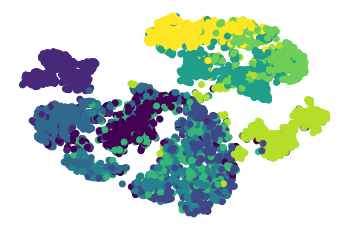

In [46]:
#### It will take a min

from sklearn.manifold import TSNE

recs = encoder.predict(X_valid)
tsne = TSNE() # project to 2 dims by default

# All `fit()` methods in scikit-learn expects 2D arrays, so flatten reconstructed data.
s = recs.shape # (num_samples, width, height)
new_shape = (s[0], np.prod(s[1:])) # (num_samples, width * height)
flat = recs.reshape(new_shape)
comp = tsne.fit_transform(flat)
# Normalize data bounds so that they fit in a [0,1] square plot.
comp = (comp - comp.min()) / (comp.max() - comp.min())

plt.scatter(comp[:, 0], comp[:, 1], c=y_valid)
plt.axis('off')
plt.show()

Again, since we have labels in this dataset, we can use them as color cues.

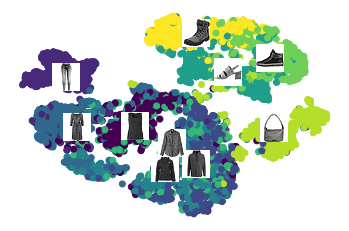

In [47]:
def centroid(arr):
    N, dims = arr.shape
    return np.array([np.sum(arr[:, i])/N for i in range(dims)])

plt.scatter(comp[:, 0], comp[:, 1], c=y_valid)
for label in list(set(y_valid)):
    # Gather all samples with current label.
    indices = np.where(y_valid == label)
    samples_orig = np.take(X_valid, indices[0], axis=0)
    samples_comp = np.take(comp, indices[0], axis=0)
    # Compute centroid of projected samples.
    center = centroid(samples_comp)
    # Display a representative image (at random) near each centroid.
    # NB: `np.random.choice()` always returns a list, even if we request only one result.
    sample = randselect(samples_orig)[0]
    imgbox = mpl.offsetbox.OffsetImage(sample, cmap='binary')
    imgpic = mpl.offsetbox.AnnotationBbox(imgbox, center, frameon=False)
    plt.gca().add_artist(imgpic)

plt.axis('off')
plt.show()

<a href="#outline">Back to top!</a></li>

# Part 4: Advanced topics (if time permits) <a id="4">

<div class="alert alert-block alert-success">
<h2><img src="images/goal.png" width=20, align="left">&nbsp;Learning objectives of part 4 (optional)</h2>
    <br>Learn to:
    <ul>
        <li>have some concepts of how DL is applied in HCI field
        <li>enable faster training
        <li>NO ASSIGNMENTS FOR THIS PART!
    </ul>
</div>

## 4.1 Examples of DL in HCI <a id="41">

### 1. CNN example: 
### Sensing Fine-Grained Hand Activity with Smartwatches, Laput et al., CHI '19 (CMU)

In [48]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/a-ImMjOrbbI" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/usr/local/lib/python3.7/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


<img src="images/fine-grain1.png" width =700>

--- 
<img src="images/fine-grain2.png" width = 400>

---
<img src="images/fine-grain3.png">

### 2. RNN (LSTM) example: 
### Lost in Style: Gaze-driven Adaptive Aid for VR Navigation, Alghofaili et al., CHI '19

In [553]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/VJeFnA3IXOg" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

---
<img src="images/lstm-example.png" width=450>

### 3. Autoencoder example:
### Wireframe-based UI Design Search through Image Autoencoder, Chen et al., ACM Transactions on Software Engineering and Methodology 2020

<img src="images/wireframe1.png" width=700>

---
<img src="images/wireframe2.png" width=700>

---
<img src="images/wireframe3.png" width=700>

---
<img src="images/wireframe4.png" width=700>

## 4.2 Learn faster from previous experiences: Transfer Learning<a id="42">

### Basic concept:

While Deep Learning has great success in various fields, one limitation is long training time for each task.

**Transfer learning** is a machine learning technique where a model trained on one task is re-purposed on a second related task.

<img src="images/transfer1.png" width=700>

### Steps of doing transfer learning:
1. Remove the fully connected nodes at the end of the network (i.e., where the actual class label predictions are made).
2. Replace the fully connected nodes with freshly initialized ones.
3. Freeze earlier CONV layers earlier in the network (ensuring that any previous robust features learned by the CNN are not destroyed).

<img src="images/transfer2.png" width=700>

4. Start training, but only train the FC layer heads.
5. Optionally unfreeze some/all of the CONV layers in the network and perform a second pass of training.

<img src="images/transfer3.png" width=700>

### Limitations of transfer learning:

1. Assuming the previous task and the new task share highly similar low-level features.
2. Assuming transfering from current task and the new task is easy.
3. The knowledge is solely based on **one** previous task so it's hard to generalize to multi-task learning.

<img src="images/dlte.png" width=700>

## 4.3 Learning to learn fast: Meta-Learning<a id="43">

### Basic concept:

People who know how to ride a bike are likely to discover the way to ride a motorcycle fast with little or even no demonstration. Is it possible to design a machine learning model with similar properties — learning new concepts and skills fast with a few training examples? That’s essentially what meta-learning aims to solve.

We expect a good meta-learning model capable of well adapting or generalizing to new tasks and new environments that have never been encountered during training time. The adaptation process, essentially a mini learning session, happens during test but with a limited exposure to the new task configurations. Eventually, the adapted model can complete new tasks. This is why meta-learning is also known as learning to learn.

<img src="images/meta0.png">

### 1. LSTM meta-learner

<img src="images/meta1.png" width = 600>

Paper: [Optimization as a Model for Few-Shot Learning, ICLR, 2017](https://openreview.net/pdf?id=rJY0-Kcll)

---
### 2. Memory-augmented Neural Network

<img src="images/meta2.png" width = 400>

Paper: [Meta-Learning with Memory-Augmented Neural Networks, ICML, 2016](http://web.stanford.edu/class/psych209/Readings/Santoro16MetaLearningWithMemAugNNs.pdf)

---
### 3. Model-agnostic meta learning

<img src="images/meta3.png" width=400>

Paper: [Model-Agnostic Meta-Learning for Fast Adaptation of Deep Networks, ICML, 2017](https://arxiv.org/pdf/1703.03400.pdf)

<a href="#outline">Back to top!</a></li>

# Summary<a id="summary">

<div class="alert alert-block alert-success">
<h2><img src="images/goal.png" width=20, align="left">&nbsp;Learning objectives of this lecture</h2>
    <ul>
    <li>Part 0 Sensing flow:
    <ul>
        <li>know transfer function and filters (exercise 1)
    </ul>
    <li>Part 1 CNN and fully connected layers:
    <ul>
        <li>build a model using CNN & fully connected layers (exercise 2)
    </ul>
    <li>Part 2 RNN and LSTM:
    <ul>
        <li>build a model using LSTM (exercise 3)
    </ul>
    <li>Part 3 Autoencoder:
    <ul>
        <li>apply autoencoder for various purposes (exercise 4, 5) 
    </ul>
    <li>Part 4 Advanced topics:
    <ul>
        <li>have basic idea about transfer learning and meta-learning (optional advanced exercise)
    </ul>
</div>

<a href="#outline">Back to top!</a></li>